# Import Library 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from ggplot import *
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

C:\Users\pkche\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\pkche\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\pkche\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Read data, data cleaning, and data preparation 

In [0]:
data2005_2007 = pd.read_csv('data/accidents_2005_to_2007.csv', na_values=['NULL'], low_memory = False) 
data2009_2011 = pd.read_csv('data/accidents_2009_to_2011.csv', na_values=['NULL'], low_memory = False) 
data2012_2014 = pd.read_csv('data/accidents_2012_to_2014.csv', na_values=['NULL'], low_memory = False) 
dataAADF = pd.read_csv('data/ukTrafficAADF.csv', na_values=['NULL'], low_memory=False)
#combine data from 2005 - 2014
data = pd.concat([data2005_2007, data2009_2011, data2012_2014])


In [0]:
print(data['Time'].isnull().sum() / len(data['Time']))
print(data['Weather_Conditions'].isnull().sum() / len(data['Weather_Conditions']))
data = data.dropna(subset = ['Time'])
data = data.dropna(subset = ['Weather_Conditions'])

7.77847953994e-05
8.37682411993e-05


In [0]:
#change the format of data['Date'] into datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
#add 'month' & 'day' variable
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
#add 'hour' variable
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce').dt.hour.astype('int')

# descriptive statistic

In [0]:
list(data.columns)

['Accident_Index',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'LSOA_of_Accident_Location',
 'Year',
 'Hour']

In [0]:
data.describecribe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.504049e+06,1.504049e+06,1.504049e+06,1.504049e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,0.0,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06
mean,4.396214e+05,3.001584e+05,-1.436625e+00,5.258940e+01,3.020536e+01,2.838190e+00,1.831606e+00,1.350960e+00,4.118607e+00,3.476149e+02,4.087999e+00,1.009919e+03,3.900540e+01,NaN,2.675084e+00,3.815684e+02,1.353871e+00,2.009370e+03
std,9.511616e+04,1.610084e+05,1.398078e+00,1.449889e+00,2.551603e+01,4.018423e-01,7.147586e-01,8.253345e-01,1.924405e+00,2.594292e+02,1.428936e+00,1.823518e+03,1.413993e+01,NaN,3.205539e+00,1.302555e+03,4.783534e-01,3.013497e+00
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,NaN,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,3.750600e+05,1.782600e+05,-2.373902e+00,5.149016e+01,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.100000e+02,3.000000e+00,0.000000e+00,3.000000e+01,NaN,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,4.399600e+05,2.688300e+05,-1.403714e+00,5.230913e+01,3.000000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.220000e+02,4.000000e+00,1.290000e+02,3.000000e+01,NaN,3.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03
75%,5.230600e+05,3.981510e+05,-2.215100e-01,5.347858e+01,4.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.180000e+02,6.000000e+00,7.250000e+02,5.000000e+01,NaN,6.000000e+00,0.000000e+00,2.000000e+00,2.012000e+03
max,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,NaN,6.000000e+00,9.999000e+03,3.000000e+00,2.014000e+03


In [0]:
data.groupby(['Accident_Severity'])['Number_of_Casualties'].mean().to_frame().reset_index()

,Accident_Severity,Number_of_Casualties
0,1,1.886889
1,2,1.452857
2,3,1.326544


In [0]:
data.groupby(['Accident_Severity'])['Accident_Index'].count().to_frame().reset_index()

,Accident_Severity,Accident_Index
0,1,19441
1,2,204504
2,3,1280205


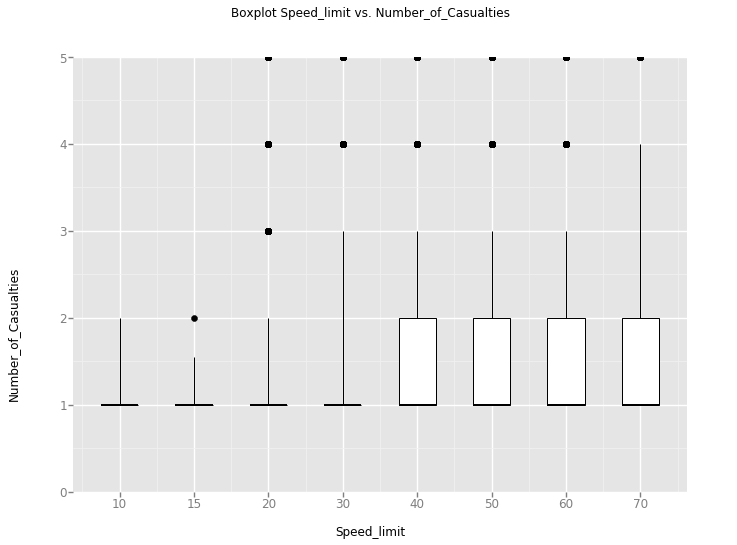

<ggplot: (145248827645)>

In [0]:
ggplot(data, aes(x = 'Speed_limit', y = 'Number_of_Casualties')) + \
geom_boxplot() + \
ggtitle("Boxplot Speed_limit vs. Number_of_Casualties") +\
ylim(0, 5)

Groupby speed_limit and number of casualties

In [0]:
test = data.groupby(['Speed_limit', 'Number_of_Casualties'])['Accident_Index'].count().to_frame().reset_index()
test.pivot(columns='Speed_limit', values= 'Accident_Index', index = 'Number_of_Casualties')

Speed_limit,10,15,20,30,40,50,60,70
Number_of_Casualties,,,,,,,,
1,11.0,9.0,14998.0,787233.0,87089.0,32942.0,159643.0,71829.0
2,3.0,1.0,1584.0,130094.0,24004.0,10443.0,51417.0,23732.0
3,NaN,NaN,376.0,33324.0,7147.0,3354.0,16791.0,7863.0
4,NaN,NaN,127.0,11272.0,2640.0,1264.0,6390.0,3352.0
5,NaN,NaN,48.0,3955.0,950.0,479.0,2419.0,1365.0
6,NaN,NaN,10.0,1426.0,348.0,171.0,932.0,599.0
7,NaN,NaN,5.0,448.0,108.0,72.0,302.0,226.0
8,NaN,NaN,2.0,197.0,45.0,24.0,133.0,110.0
9,NaN,NaN,1.0,104.0,21.0,14.0,51.0,55.0


In [0]:
# from sklearn.decomposition import PCA
# import seaborn as sns; sns.set()
# sns.set()
# pca = PCA().fit(data)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance');

Total number of accidents by year

False


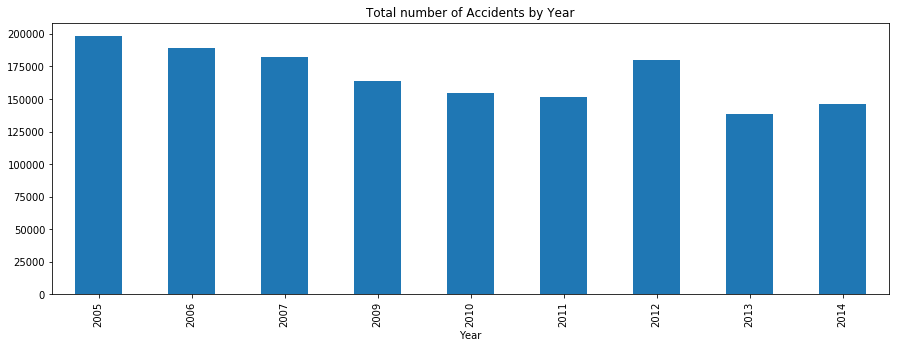

In [0]:
# Total number of accidents by Year
print(data["Accident_Index"].isnull().any())
plt.figure(figsize = (15, 5))
data.groupby('Year')['Accident_Index'].count().plot(kind = 'bar')
plt.title('Total number of Accidents by Year')
plt.savefig('Total number of Accidents by Year.png')

Total number of Casualties by Year

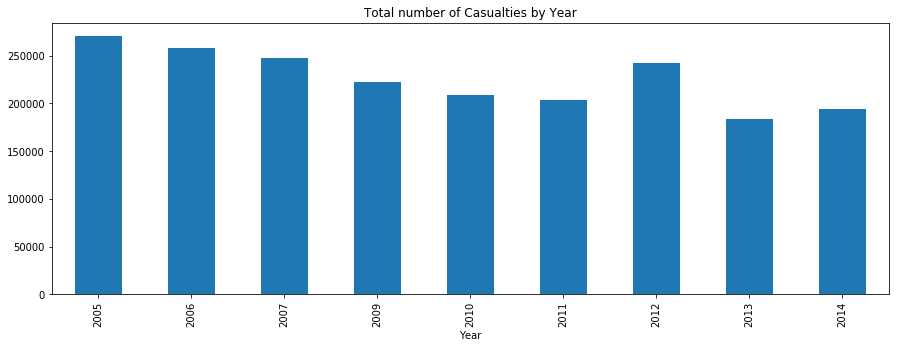

In [0]:
# Total number of Casualties by Year
plt.figure(figsize = (15, 5))
data.groupby('Year')['Number_of_Casualties'].sum().plot(kind = 'bar')
plt.title('Total number of Casualties by Year');
plt.savefig('Total number of Casualties by Year.png')

Total number of accidents by Day_of_Week

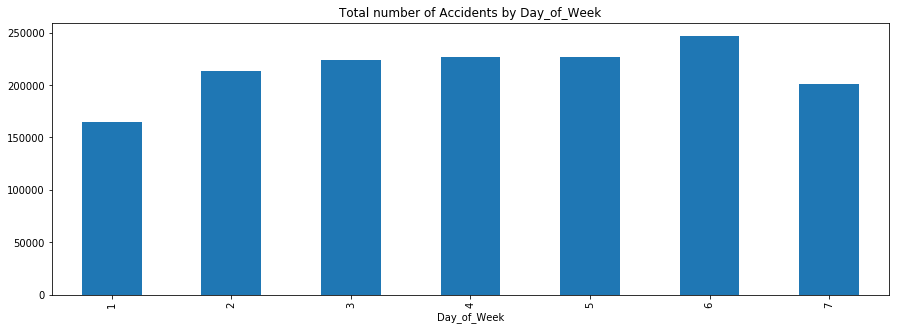

In [0]:
# Total number of accidents by Day_of_Week
plt.figure(figsize = (15, 5))
data.groupby('Day_of_Week')['Accident_Index'].count().plot(kind = 'bar')
plt.title('Total number of Accidents by Day_of_Week')
plt.savefig('Total number of Accidents by Day_of_Week.png')
#plt.bar(np.arange(1,8), data.groupby('Day_of_Week')['Accident_Index'].count())values

Total number of Casualties by Day_of_Week

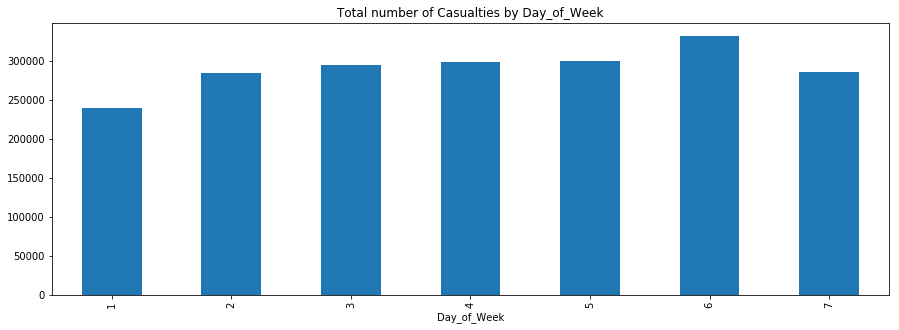

In [0]:
# Total number of Casualties by Day_of_Week
plt.figure(figsize = (15, 5))
data.groupby('Day_of_Week')['Number_of_Casualties'].sum().plot(kind = 'bar')
plt.title('Total number of Casualties by Day_of_Week')
plt.savefig('Total number of Casualties by Day_of_Week.png')

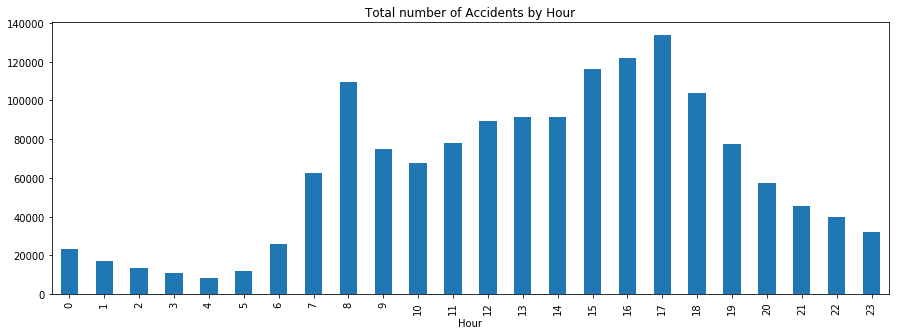

In [0]:
# Total number of accidents by Hour
plt.figure(figsize = (15, 5))
data.groupby('Hour')['Accident_Index'].count().plot(kind = 'bar')
plt.title('Total number of Accidents by Hour')
plt.savefig('Total number of Accidents by Hour.png')

In [0]:
data.groupby('Hour')['Accident_Index'].count()

Hour
0      23025
1      16890
2      13618
3      10827
4       8347
5      12035
6      25832
7      62374
8     109622
9      74901
10     67895
11     78135
12     89225
13     91362
14     91262
15    116266
16    122131
17    133739
18    104085
19     77728
20     57216
21     45749
22     39891
23     31878
Name: Accident_Index, dtype: int64

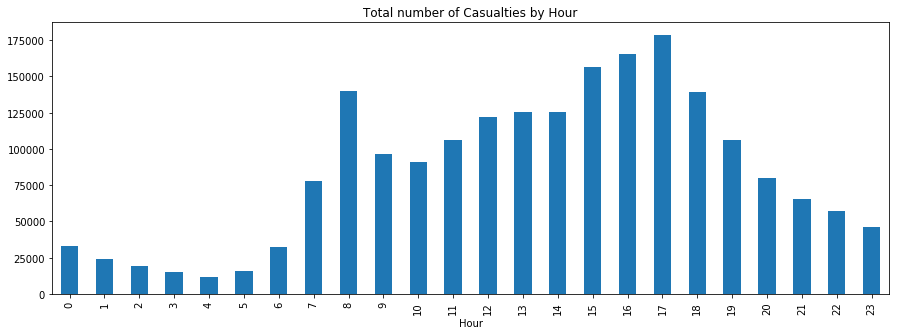

In [0]:
# Total number of Casualties by Hour
plt.figure(figsize = (15, 5))
data.groupby('Hour')['Number_of_Casualties'].sum().plot(kind = 'bar')
plt.title('Total number of Casualties by Hour')
plt.savefig('Total number of Casualties by Hour.png')

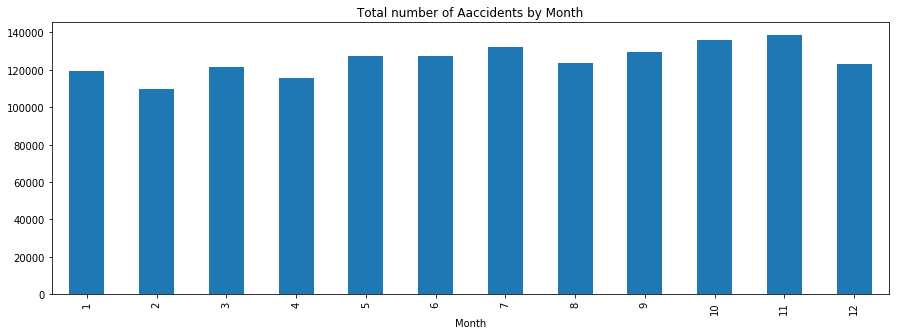

In [0]:
# Total number of Casualties by Month
plt.figure(figsize = (15, 5))
data.groupby('Month')['Accident_Index'].count().plot(kind = 'bar')
plt.title('Total number of Aaccidents by Month')
plt.savefig('Total number of Accidents by Month.png')

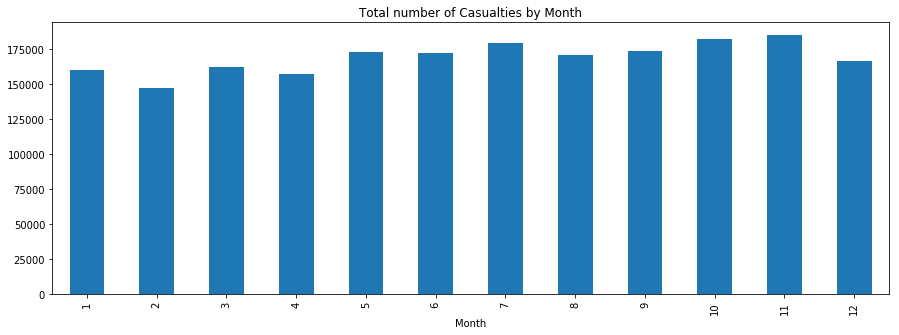

In [0]:
# Total number of Casualties by Month
plt.figure(figsize = (15, 5))
data.groupby('Month')['Number_of_Casualties'].sum().plot(kind = 'bar')
plt.title('Total number of Casualties by Month')
plt.savefig('Total number of Casualties by Month.png')

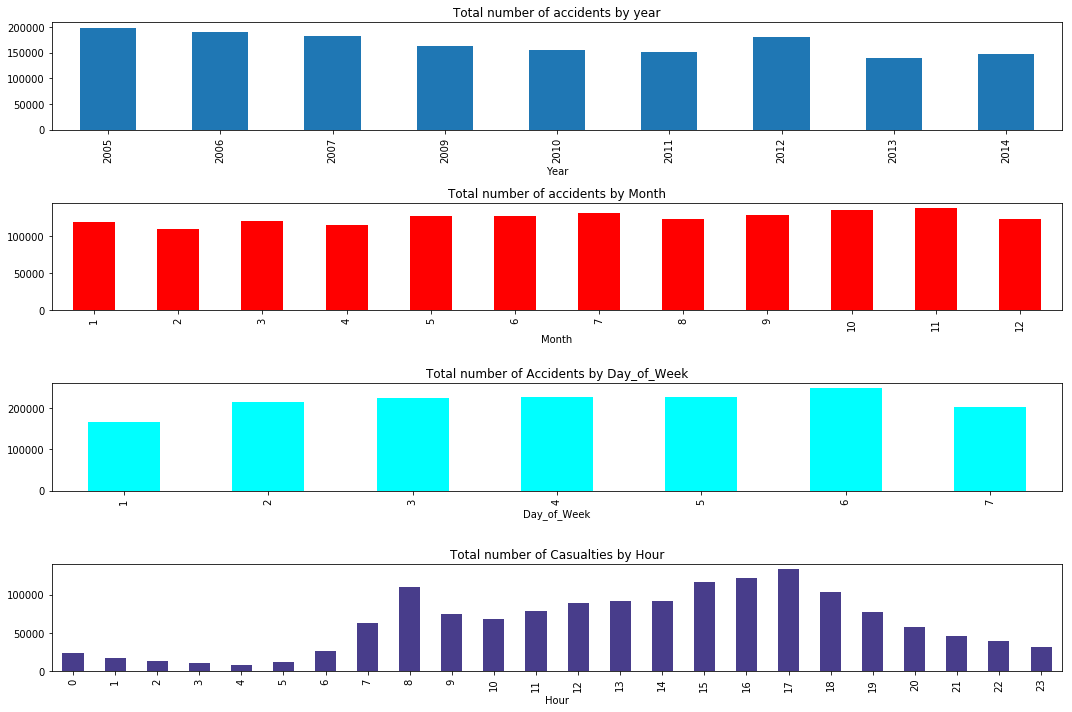

In [0]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(411)
data.groupby('Year')['Accident_Index'].count().plot(ax = ax1, kind = 'bar')
ax1.set_title('Total number of accidents by year')

ax2 = fig.add_subplot(412)
data.groupby('Month')['Accident_Index'].count().plot(ax = ax2, color = 'red', kind = 'bar')
ax2.set_title('Total number of accidents by Month')

ax3 = fig.add_subplot(413)
data.groupby('Day_of_Week')['Accident_Index'].count().plot(ax = ax3, color = 'aqua', kind = 'bar')
ax3.set_title('Total number of Accidents by Day_of_Week')

ax4 = fig.add_subplot(414)
data.groupby('Hour')['Accident_Index'].count().plot(ax = ax4, color = 'darkslateblue', kind = 'bar')
ax4.set_title('Total number of Casualties by Hour')

plt.tight_layout()
fig.savefig('accidents.png')

In [0]:
data.groupby('Month')['Accident_Index'].count()

Month
1     119579
2     109902
3     121263
4     115490
5     127626
6     127442
7     132042
8     123501
9     129576
10    135992
11    138545
12    123075
Name: Accident_Index, dtype: int64

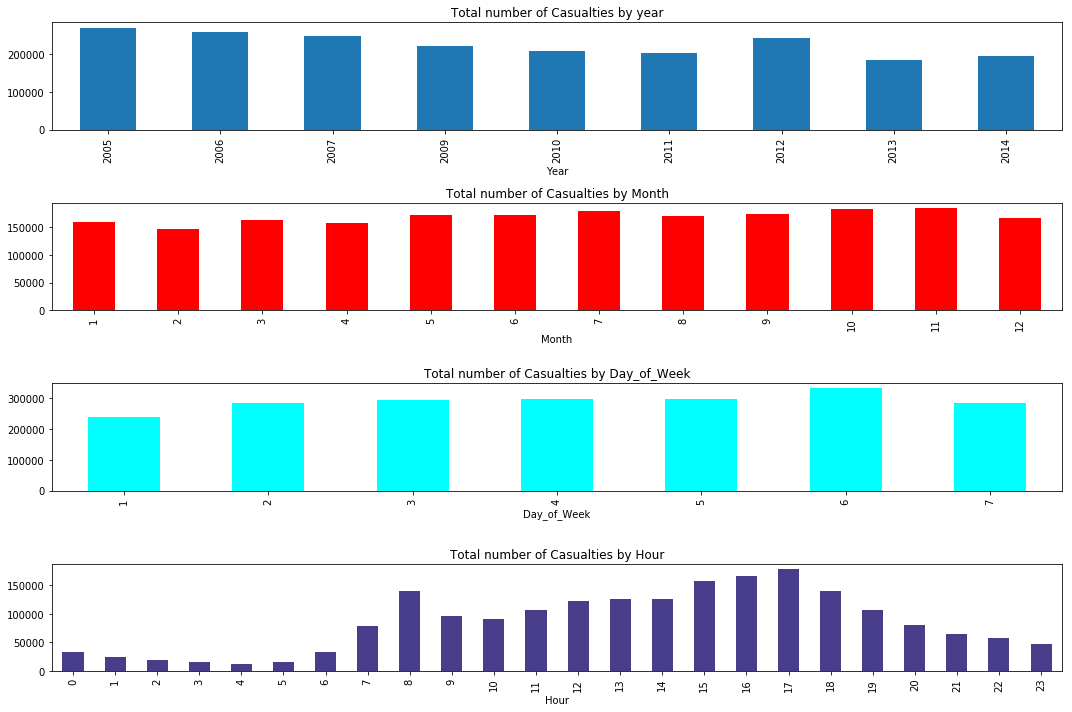

In [0]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(411)
data.groupby('Year')['Number_of_Casualties'].sum().plot(ax = ax1, kind = 'bar')
ax1.set_title('Total number of Casualties by year')

ax2 = fig.add_subplot(412)
data.groupby('Month')['Number_of_Casualties'].sum().plot(ax = ax2, color = 'red', kind = 'bar')
ax2.set_title('Total number of Casualties by Month')

ax3 = fig.add_subplot(413)
data.groupby('Day_of_Week')['Number_of_Casualties'].sum().plot(ax = ax3, color = 'aqua', kind = 'bar')
ax3.set_title('Total number of Casualties by Day_of_Week')

ax4 = fig.add_subplot(414)
data.groupby('Hour')['Number_of_Casualties'].sum().plot(ax = ax4, color = 'darkslateblue', kind = 'bar')
ax4.set_title('Total number of Casualties by Hour')

plt.tight_layout()
fig.savefig('Casualties.png')

Number of Casualties in different year

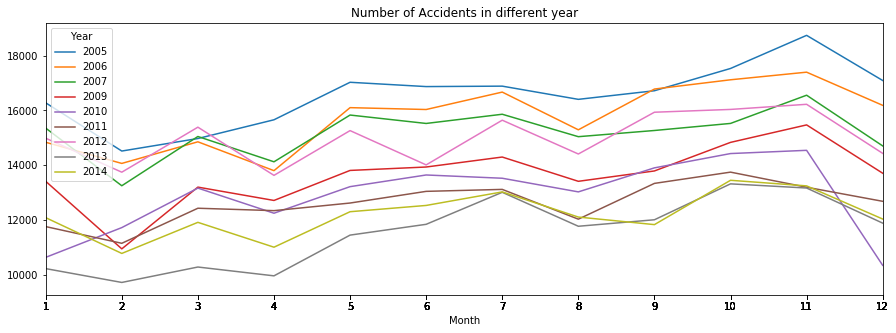

In [0]:
group_by_year_month = data.groupby(['Year', 'Month'])['Accident_Index'].count().to_frame().reset_index()
# plt.figure(figsize=(15, 15))
fig, ax = plt.subplots(figsize=(15, 5))
group_by_year_month.pivot(columns='Year', values= 'Accident_Index', index = 'Month').plot(ax = ax)
# group_by_year_month.plot()
ax.set_title('Number of Accidents in different year')
ax.set_xticks(group_by_year_month['Month'].values)
fig.savefig('Number of Accidents in different year.png')

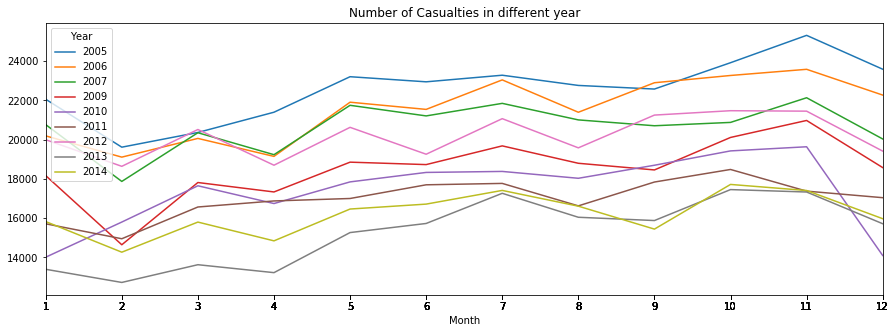

In [0]:
group_by_year_month = data.groupby(['Year', 'Month'])['Number_of_Casualties'].sum().to_frame().reset_index()
# plt.figure(figsize=(15, 15))
fig, ax = plt.subplots(figsize=(15, 5))
group_by_year_month.pivot(columns='Year', values= 'Number_of_Casualties', index = 'Month').plot(ax = ax)
# group_by_year_month.plot()
ax.set_title('Number of Casualties in different year')
ax.set_xticks(group_by_year_month['Month'].values)
fig.savefig('Number of Casualties in different year.png')

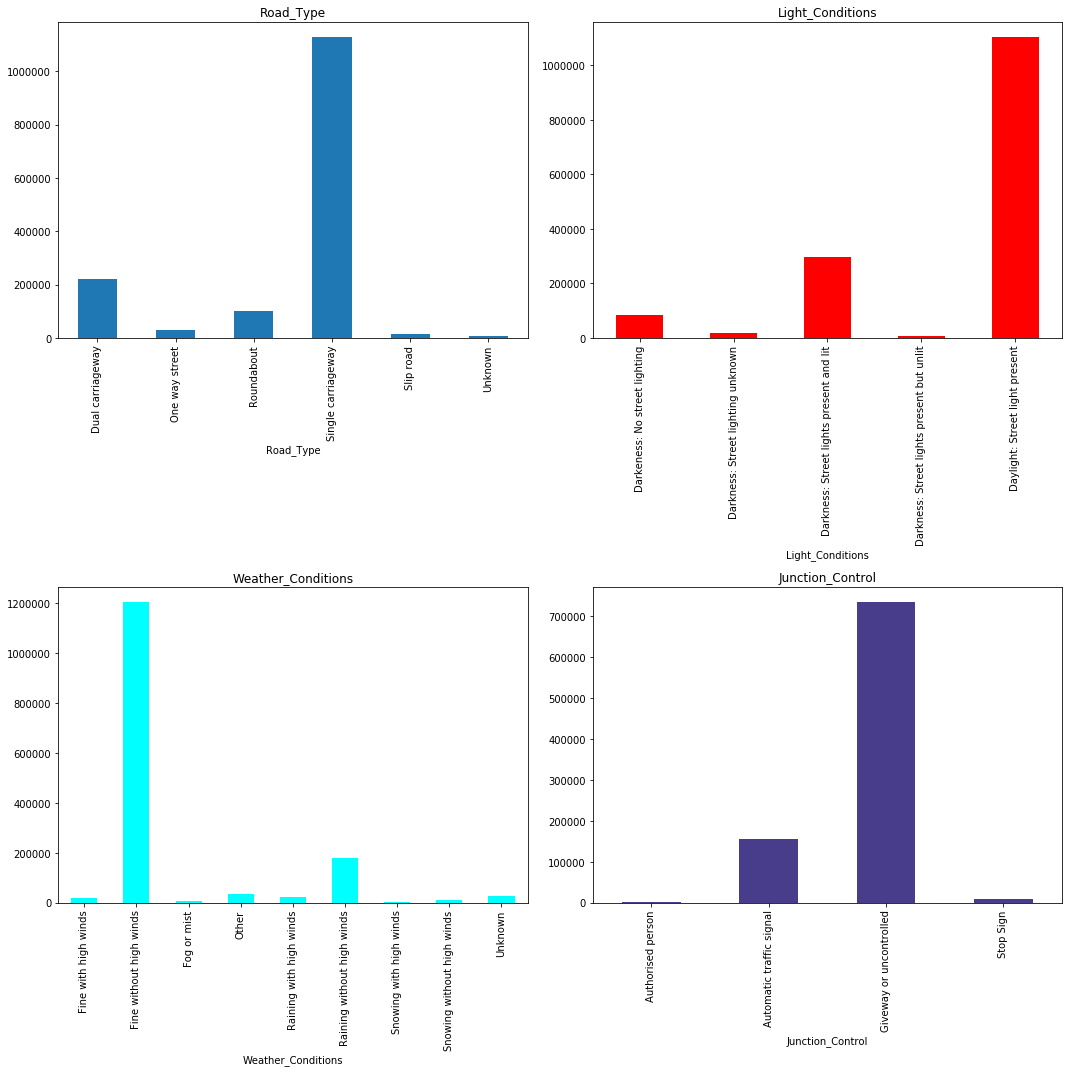

In [0]:
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(221)
data.groupby('Road_Type')['Accident_Index'].count().plot(ax = ax1, kind = 'bar')
ax1.set_title('Road_Type')

ax2 = fig.add_subplot(222)
data.groupby('Light_Conditions')['Accident_Index'].count().plot(ax = ax2, color = 'red', kind = 'bar')
ax2.set_title('Light_Conditions')

ax3 = fig.add_subplot(223)
data.groupby('Weather_Conditions')['Accident_Index'].count().plot(ax = ax3, color = 'aqua', kind = 'bar')
ax3.set_title('Weather_Conditions')

ax4 = fig.add_subplot(224)
data.groupby('Junction_Control')['Accident_Index'].count().plot(ax = ax4, color = 'darkslateblue', kind = 'bar')
ax4.set_title('Junction_Control')

plt.tight_layout()
fig.savefig('Four condition.png')

In [0]:
data['Police_Force'].mean()

30.20049511040244

In [0]:
# data.groupby('')
percentageplot = pd.DataFrame({'count': data.groupby('Weather_Conditions').size(), 'Number_of_Casualties': data.groupby('Weather_Conditions')['Number_of_Casualties'].mean(), 'Police_Force':data.groupby('Weather_Conditions')['Police_Force'].mean()}).reset_index()
percentageplot['countplot'] = percentageplot['count'] * 0.01
percentageplot

,Weather_Conditions,Number_of_Casualties,Police_Force,count,countplot
0,Fine with high winds,1.374305,33.505067,18354,183.54
1,Fine without high winds,1.345423,29.464006,1203857,12038.57
2,Fog or mist,1.440156,35.101490,8188,81.88
3,Other,1.357712,33.764172,33499,334.99
4,Raining with high winds,1.395896,38.619672,20811,208.11
5,Raining without high winds,1.394386,32.257544,177651,1776.51
6,Snowing with high winds,1.418878,40.095918,1960,19.60
7,Snowing without high winds,1.343863,34.467658,11301,113.01
8,Unknown,1.230503,32.258043,28286,282.86


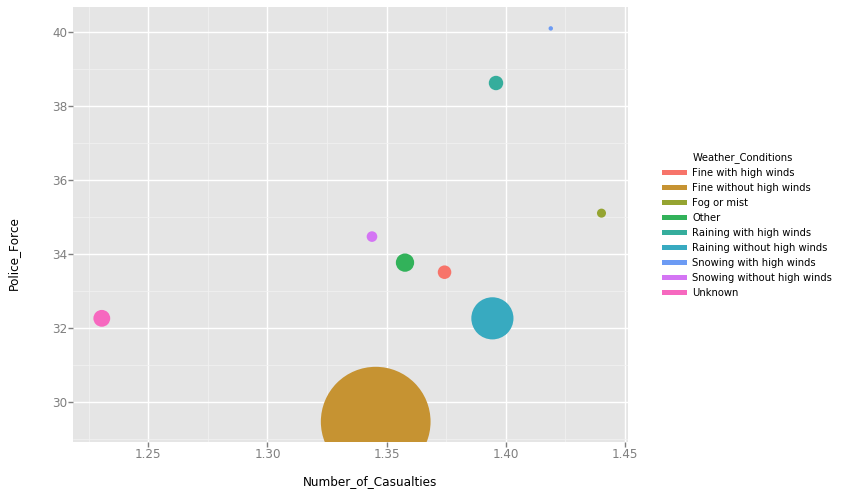

In [0]:
gg = ggplot(aes(x = 'Number_of_Casualties', y = 'Police_Force', color = "Weather_Conditions"), data = percentageplot) +\
geom_point(aes(size = 'countplot'))
gg.save('Casualties vs. Police_Force by weather_condition.png')

In [0]:
# data.groupby('')
percentageplot = pd.DataFrame({'count': data.groupby('Local_Authority_(Highway)').size(), 'Longitude': data.groupby('Local_Authority_(Highway)')['Longitude'].mean(), 'Latitude':data.groupby('Local_Authority_(Highway)')['Latitude'].mean()}).reset_index()
percentageplot['countplot'] = percentageplot['count'] * 0.01
percentageplot

,Local_Authority_(Highway),Latitude,Longitude,count,countplot
0,E06000001,54.679634,-1.229482,1473,14.73
1,E06000002,54.556669,-1.232089,2804,28.04
2,E06000003,54.572142,-1.068662,2096,20.96
3,E06000004,54.568953,-1.318447,3049,30.49
4,E06000005,54.536391,-1.553513,2675,26.75
5,E06000006,53.347747,-2.718712,3115,31.15
6,E06000007,53.398730,-2.573157,6709,67.09
7,E06000008,53.733845,-2.477843,4429,44.29
8,E06000009,53.816269,-3.036422,4722,47.22
9,E06000010,53.758040,-0.341672,7058,70.58


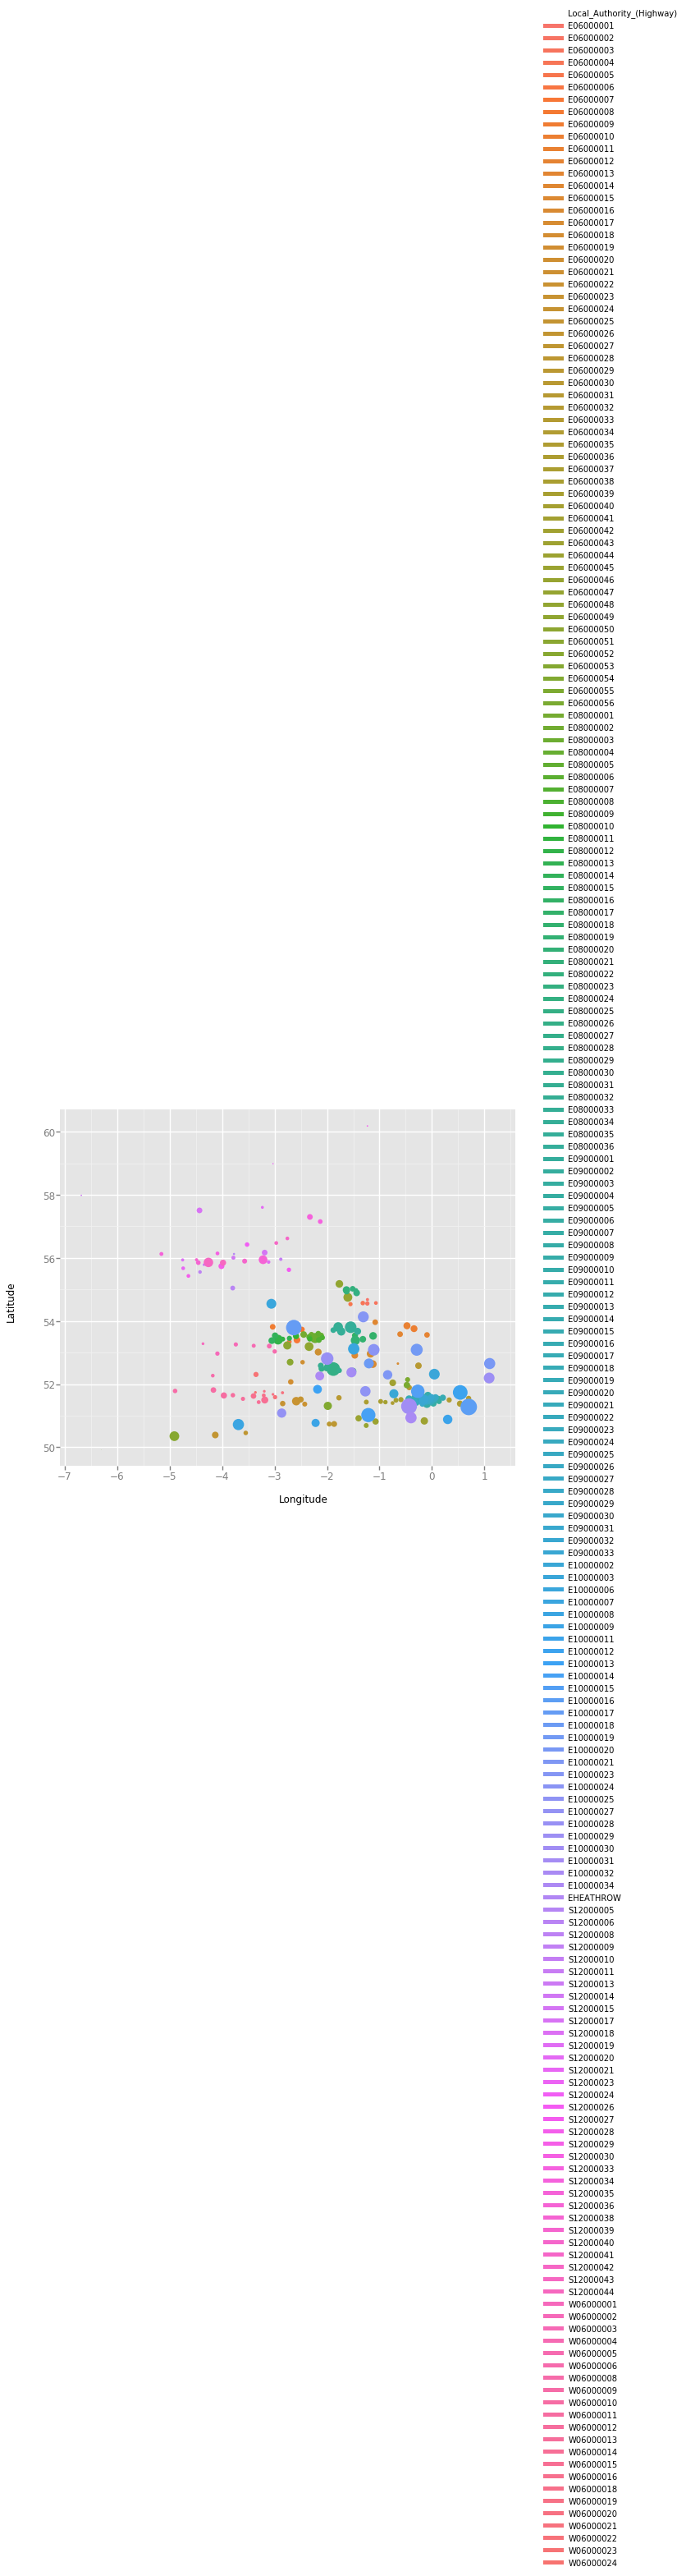

<ggplot: (145254471677)>

In [0]:
ggplot(aes(x = 'Longitude', y = 'Latitude', color = "Local_Authority_(Highway)"), data = percentageplot) +\
geom_point(aes(size = 'countplot'))

<IPython.core.display.Javascript object>


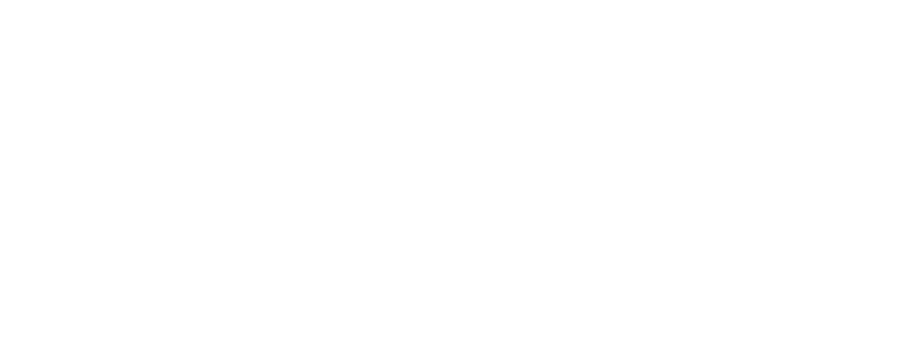

In [0]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Number_of_Casualties'], data['Number_of_Vehicles'], data['Day_of_Week'])
plt.show()
plt.savefig('3Dplot.png')

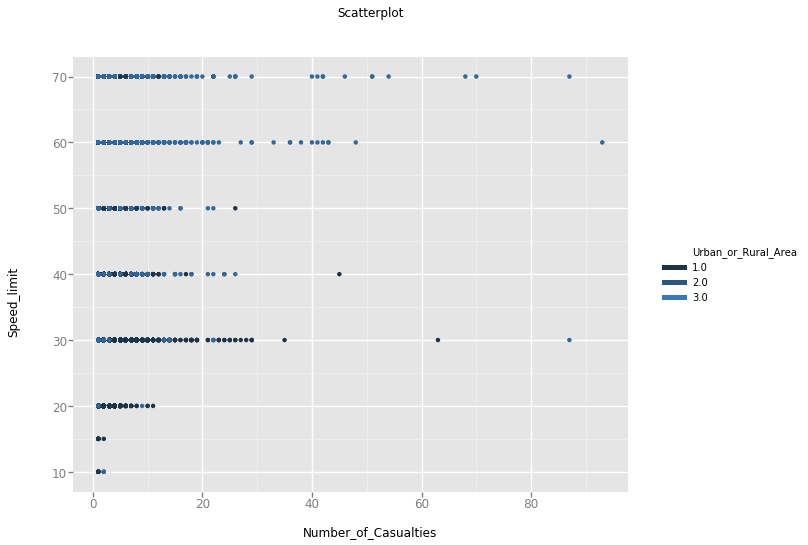

<ggplot: (145252499411)>

In [0]:
ggplot(aes(x = 'Number_of_Casualties', y = 'Speed_limit', color = "Urban_or_Rural_Area"), data = data) +\
geom_point() +\
ggtitle("Scatterplot")

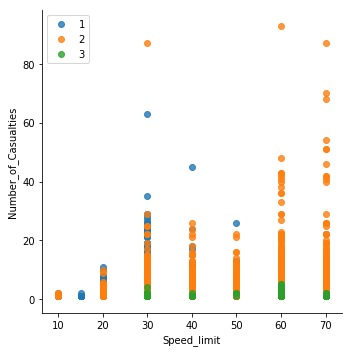

In [0]:
sns.lmplot( x = "Speed_limit", y = "Number_of_Casualties", data = data, fit_reg = False, hue = 'Urban_or_Rural_Area', legend = False)
plt.legend(loc='upper left')
plt.savefig('speed_limit vs. number_of_casualties vs. whether rural.png')

# Time Series

Time series group by month

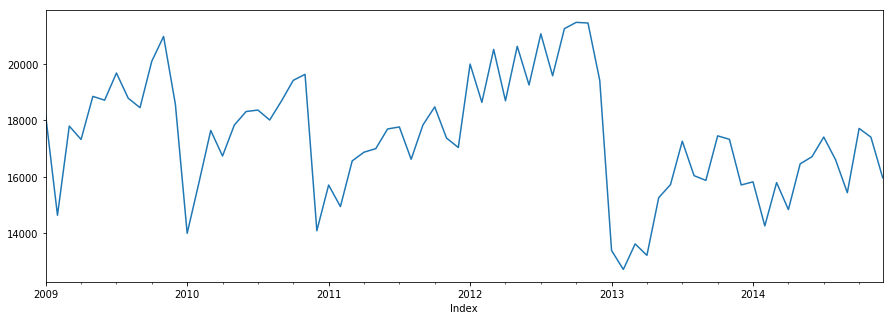

In [0]:
plt.figure(figsize = (15,5))
Casualties2009_2014byYMTS.plot()

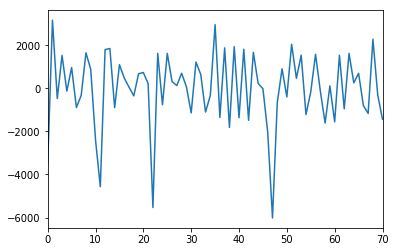

In [0]:
difference(Casualties2009_2014byYMTS).plot()

In [0]:
data2005_2007 = data[(data["Year"] >= 2005) & (data["Year"] <= 2007)].copy()
data2009_2014 = data[(data["Year"] >= 2009) & (data["Year"] <= 2014)].copy()

In [0]:
Casualties2009_2014byYM = data2009_2014.groupby(['Year', 'Month'])['Number_of_Casualties'].sum().to_frame().reset_index()

In [0]:
Casualties2009_2014byYM['Index'] = pd.date_range('2009-01', periods = Casualties2009_2014byYM.shape[0], freq = 'M')

In [0]:
Casualties2009_2014byYMTS = pd.Series(Casualties2009_2014byYM.Number_of_Casualties.values, Casualties2009_2014byYM.Index)
Casualties2009_2014by_YM_TS_Analysis = sm.tsa.seasonal_decompose(Casualties2009_2014byYMTS,  freq = 12)

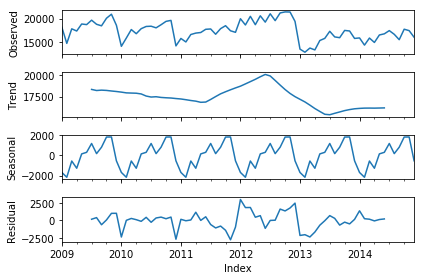

In [0]:
Casualties2009_2014by_YM_TS_Analysis_plot = Casualties2009_2014by_YM_TS_Analysis.plot()
Casualties2009_2014by_YM_TS_Analysis_plot.savefig('Casualties2009_2014by_YM_TS_Analysis_plot')


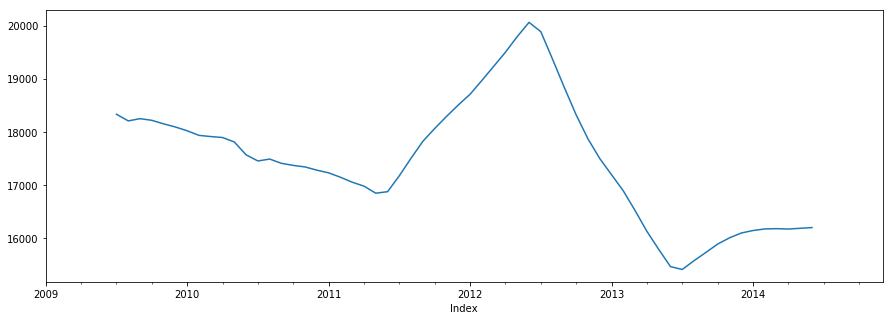

In [0]:
fig = plt.figure(figsize=(15, 5))
trend2009_2014 = Casualties2009_2014by_YM_TS_Analysis.trend.plot()
fig.savefig('trend2009_2014')

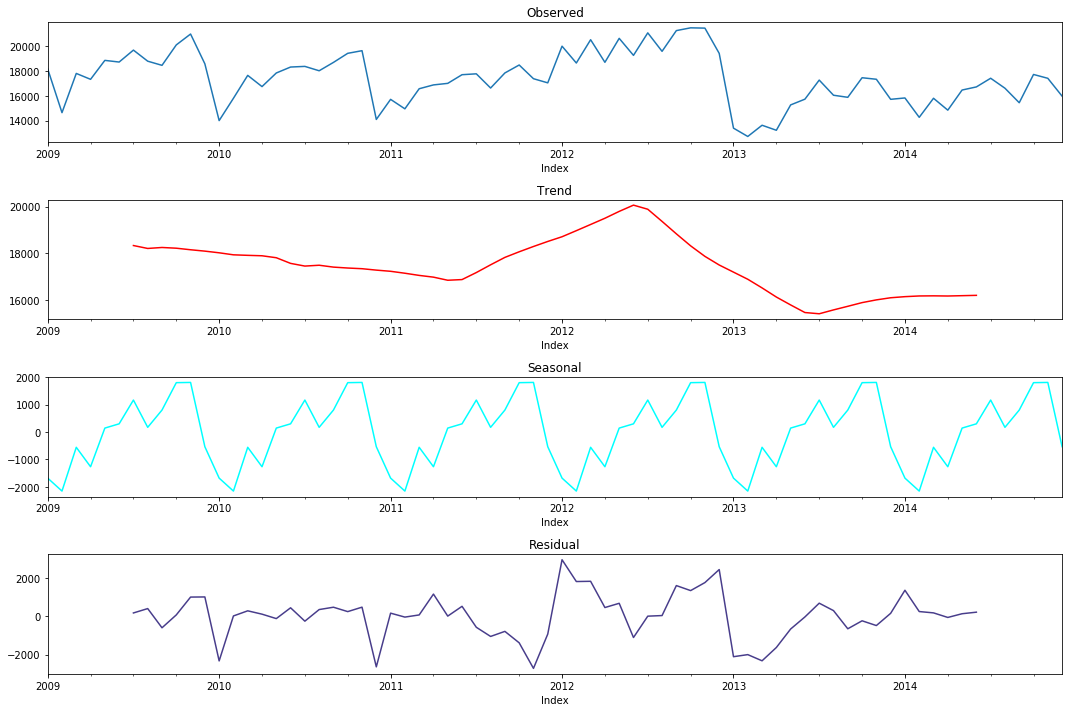

In [0]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(411)
Casualties2009_2014by_YM_TS_Analysis.observed.plot(ax = ax1)
ax1.set_title('Observed')

ax2 = fig.add_subplot(412)
Casualties2009_2014by_YM_TS_Analysis.trend.plot(ax = ax2, color = 'red')
ax2.set_title('Trend')

ax3 = fig.add_subplot(413)
Casualties2009_2014by_YM_TS_Analysis.seasonal.plot(ax = ax3, color = 'aqua')
ax3.set_title('Seasonal')

ax4 = fig.add_subplot(414)
Casualties2009_2014by_YM_TS_Analysis.resid.plot(ax = ax4, color = 'darkslateblue')
ax4.set_title('Residual')
plt.tight_layout()
plt.savefig('4time_series.png')

Time series group by date

In [0]:
Casualties2005_2007 = data2005_2007.groupby(['Date'])['Number_of_Casualties'].sum().to_frame().reset_index()
Casualties2009_2014 = data2009_2014.groupby(['Date'])['Number_of_Casualties'].sum().to_frame().reset_index()
ts_2005_2007 = pd.Series(Casualties2005_2007.Number_of_Casualties.values, Casualties2005_2007.Date)
ts_2009_2014 = pd.Series(Casualties2009_2014.Number_of_Casualties.values, Casualties2009_2014.Date)
stl_2005_2007 = sm.tsa.seasonal_decompose(ts_2005_2007, freq=365)
stl_2009_2014 = sm.tsa.seasonal_decompose(ts_2009_2014, freq=365)

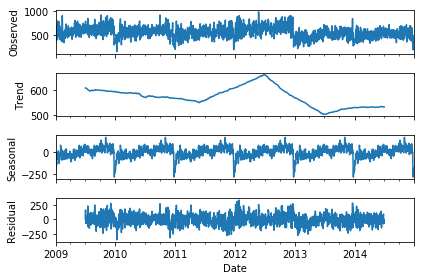

In [0]:
stl_2009_2014plot = stl_2009_2014.plot()
stl_2009_2014plot.savefig('time_series_analysis_2009_2014.png')

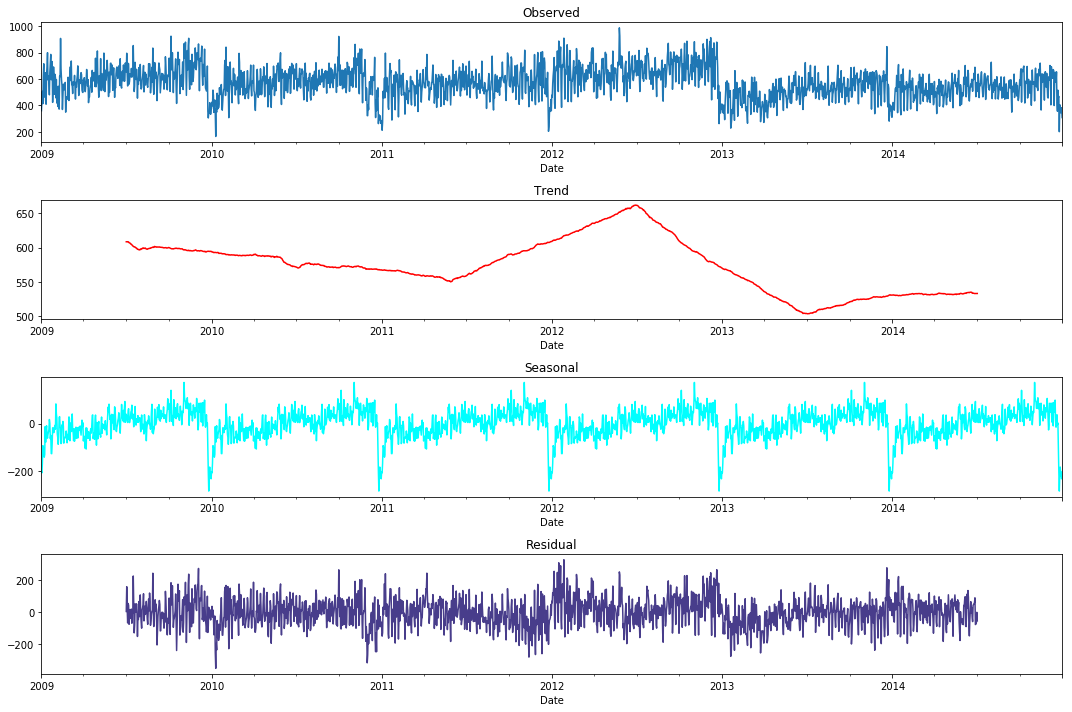

In [0]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(411)
stl_2009_2014.observed.plot(ax = ax1)
ax1.set_title('Observed')

ax2 = fig.add_subplot(412)
stl_2009_2014.trend.plot(ax = ax2, color = 'red')
ax2.set_title('Trend')

ax3 = fig.add_subplot(413)
stl_2009_2014.seasonal.plot(ax = ax3, color = 'aqua')
ax3.set_title('Seasonal')

ax4 = fig.add_subplot(414)
stl_2009_2014.resid.plot(ax = ax4, color = 'darkslateblue')
ax4.set_title('Residual')
plt.tight_layout()

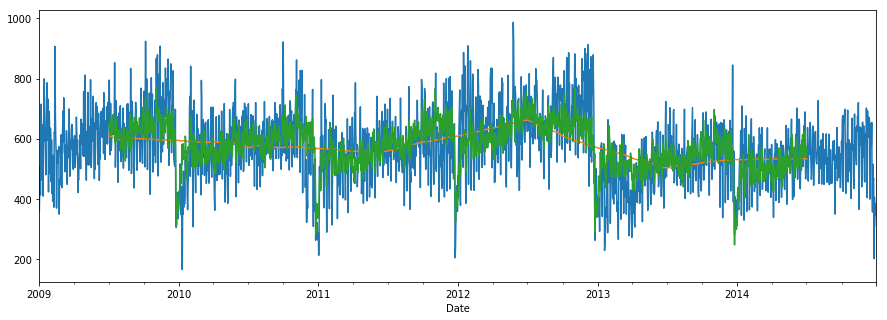

In [0]:
fig = plt.figure(figsize=(15, 5))
stl_2009_2014.observed.plot()
stl_2009_2014.trend.plot()
(stl_2009_2014.trend + stl_2009_2014.seasonal).plot()
fig.savefig('overlap.png')

time series forecast

In [0]:
def difference(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

In [0]:
sm.tsa.stattools.adfuller(Casualties2009_2014byYMTS)

(-3.7701501451985,
 0.0032279161250606996,
 0,
 71,
 {'1%': -3.5260046468256072,
  '10%': -2.5889948363419957,
  '5%': -2.9032002348069774},
 1033.3212894422879)

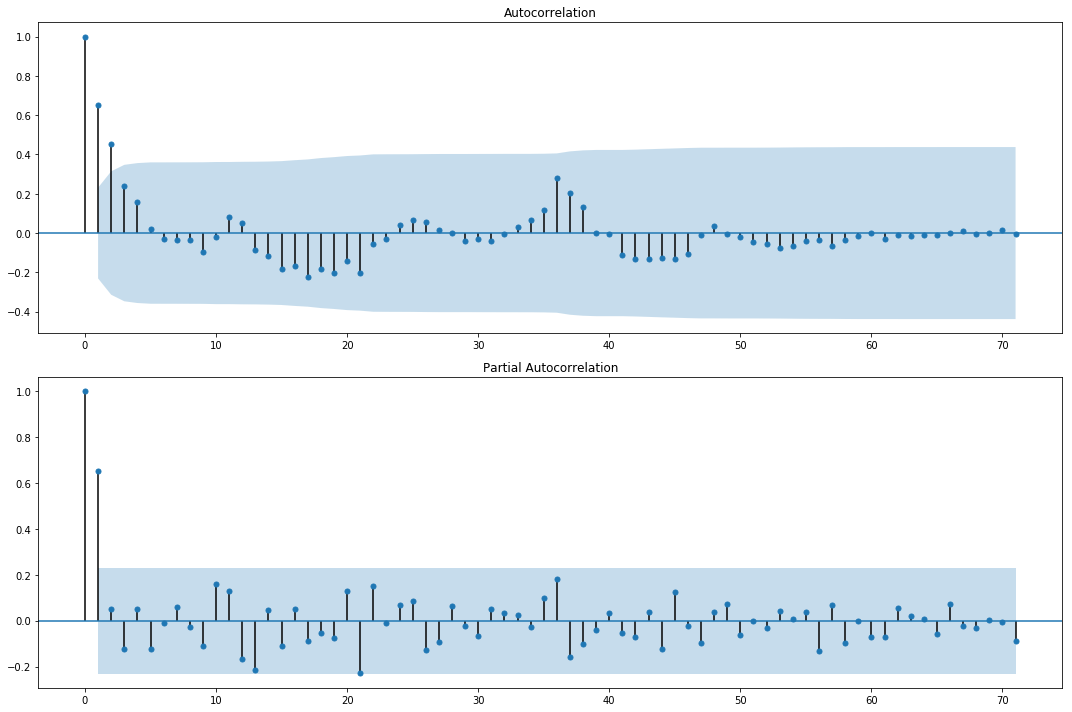

In [0]:
#arma(2,3)
plt.figure(figsize = (15, 10))
plt.subplot(211)
plot_acf(Casualties2009_2014byYMTS, ax = plt.gca())
plt.subplot(212)
plot_pacf(Casualties2009_2014byYMTS, ax = plt.gca())
plt.tight_layout()
plt.savefig('acf_pacf')


In [0]:
res = sm.tsa.arma_order_select_ic(Casualties2009_2014byYMTS.values, ic=['aic', 'bic'], trend='nc')
res.aic_min_order
# res.bic_min_order

C:\Users\pkche\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\pkche\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\pkche\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\pkche\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\pkche\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Users\pkche\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\pkche\Anaconda3

(2, 1)

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
(p,d,q) = (2,0,1)
mod = SARIMAX(Casualties2009_2014byYMTS.values, order = (p,d,q), seasonal_order = (p,d,q, 12))
res = mod.fit()
from dateutil.relativedelta import *
date_list = pd.date_range(start = max(Casualties2009_2014byYMTS.index), periods = 12, freq = 'MS')
future = pd.DataFrame(index = pd.to_datetime(date_list), columns = ['ForecastCarAccidents'])
pred_df = pd.concat([Casualties2009_2014byYMTS.to_frame(), future])
pred_df['ForecastCarAccidents'] = res.predict(start = 1, end = len(pred_df.index))

C:\Users\pkche\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


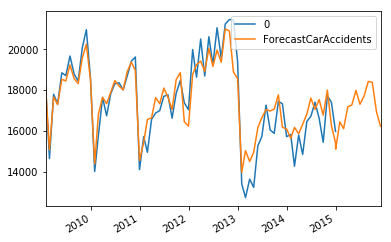

In [0]:
pd.concat([Casualties2009_2014byYMTS, pred_df['ForecastCarAccidents']], axis = 1).plot()
plt.savefig('Forecast')

In [0]:
pred_df['ForecastCarAccidents']